In [1]:
import os
import glob
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
base_dir = os.path.join('/','home','arturo','Downloads','MERGE_INPE')

In [3]:
file_list = glob.glob(os.path.join(base_dir, '*.nc'))
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 7


In [4]:
DATA = xr.open_dataset(file_list[1])
RRQPE = DATA['RRQPE'].data

In [5]:
lats = np.arange(-60,70.02,0.02)
# lons = np.arange(0,360,0.02)
lons = np.arange(-180,180,0.02)
lon2d, lat2d = np.meshgrid(lons, lats)
print(f'lat: {lats.shape}, lon: {lons.shape}')

lat: (6501,), lon: (18000,)


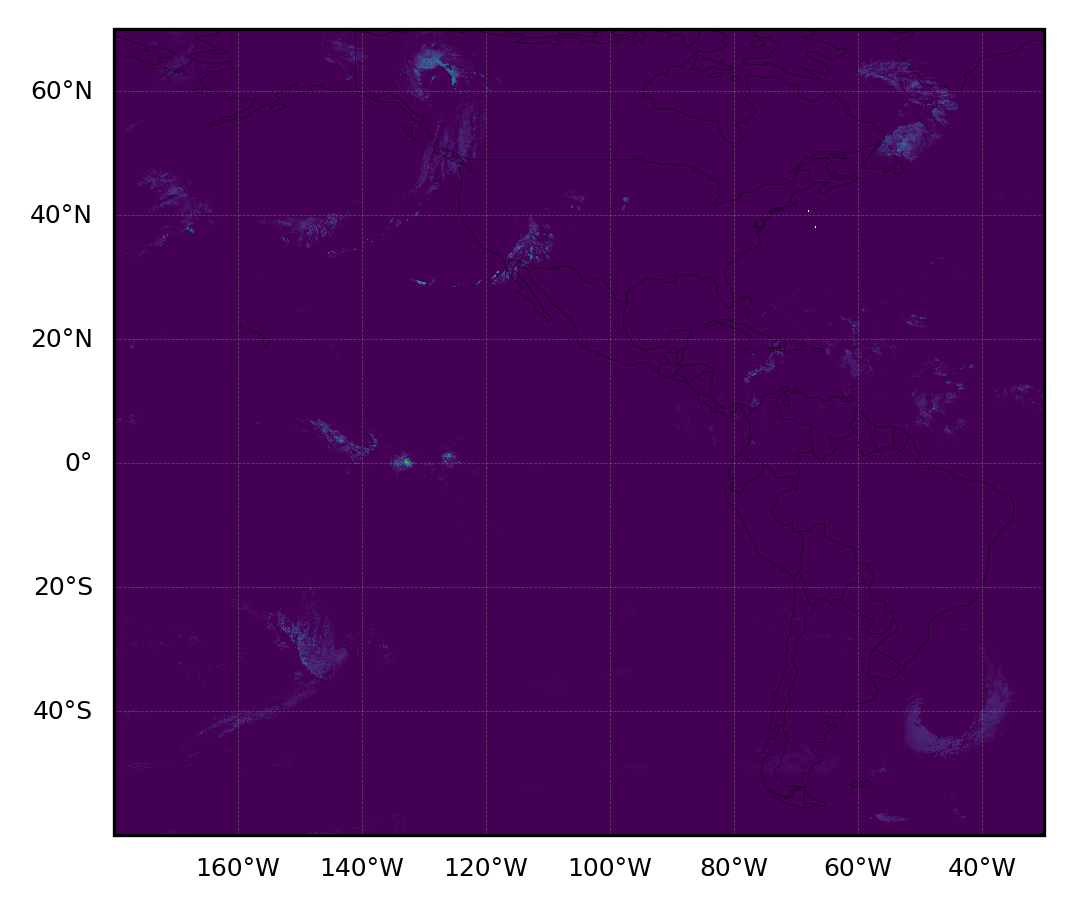

In [6]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([-180, -30, -60, 70],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

ax1.pcolormesh(lon2d, lat2d, RRQPE)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_facecolor('white')
fig.patch.set_alpha(0)